# Tecnológico de Costa Rica
## Programa de Ciencia de Datos
### Prof. Felipe Meza Obando

#### Aprendizaje automático (4B)
#### Proyecto Final

--- 
Medio de entrega: Link de GitHub en Tec Digital

Entregables: Un archivo jupyter ( .IPYNB ). 

Fecha de trabajo: Sábado, 30 de octubre del 2021.

Modo de trabajo: Parejas

Estudiantes:

Yu Hung Yeh Chai

José Alberto Raygada Agüero

# Objetivo del Proyecto Final


El objetivo del proyecto final consiste en elegir un conjunto de datos original de interés personal o laboral de mediana complejidad que no sea trivial (es decir, que permita alcanzar las actividades del proyecto final), y crear un modelo de machine learning más óptimo basado lo aprendido durante el curso, evaluar el modelo y poder realizar análisis de ello.


# Detalle del data set

Este data set que se escogió es original y de gran interés laboral, ya que si se resuelve la problemática, influencia directamente en beneficio a la compañía que trabaja un compañero de equipo. El set de datos contiene alertas que otro sistema genera a partir de varios set de datos. Estos set de datos del sistema original contiene informacion en el tiempo de volumenes de en cada momento de situaciones especiales o errores del sistema. Como manera de ejemplo, típico caso de login donde el cliente digita mal su contraseña, este caso genera un codigo y queda registrado en el sistema. En la totalidad del sistema este tipo de errores o comportamiento tiene un volumen esperado. Cuando sale fuera del volumen esperado, porque de repente hay un pico inusual, el sistema registra una alerta porque el desviación estándar es muy alto. Es precisamente este set de datos de alertas que se va a trabajar.

Se hizo un trabajo fuerte de enmascaramiento de la información para mantener la confidencialidad y dessenbilización de la información, ya que la compañía tiene fuertes políticas de confidencialidad y protección de la información. Posterior a este trabajo de enmascaramiento se procede a trabajar el equipo completo.

# Definición del problema

Actualmente, el set de datos trabajan analistas manualmente para catalogar en dos categorías: falso o verdadero.  De hecho, es una categorización logística.  Se tiene que usar varias herramientas de graficación, conocimiento del analista y registros de información para poder determinar esta categorización por parte del analista.  A pesar del proceso, puede haber error humano en la determinación de la categoría que conlleva un peso fuerte e impacto en la empresa.

# Propuesta de la solución

Se propone crear un modelo de machine learning entrenándolo con este set de datos, utilizando varios algoritmos de machine learning, evaluándolos hasta encontrar el más óptimo.  Analizar los resultados obtenidos y dar conclusiones sobre este experimento.

Una vez obtenido el modelo de machine learning, el plan es trabajarlo pos curso es usarlo con datos de tiempo real y de producción.  El plan de implementación consistirá en diferentes fases para poder hacer los ajustes necesarios en el camino de cada fase, mejorar las probabilidades de éxito de un buen proyecto y acomodo gradual del equipo al uso de la herramienta.

## Fase 1

Inicialmente, se empezará a probar con datos de tiempo real de producción, obteniendo así resultados de la categorización por un plazo a determinar.  Esta fase es para poder obtener resultados y medir la exactitud de esta, hacer los ajustes necesarios al modelo si fuese necesario.

## Fase 2 (posible fase final)

Después de esta fase de análisis, estudio, prueba y ajustes, abrir el uso del modelo a los analistas y empezar a usarlo como herramienta adicional de consulta para la toma decisión por parte del analista en la categorización de falso o verdadero.  Dependiendo de éxito de esta fase, se podría tomar un paso más hacia la automatización.

## Fase 3 (opcional)

El modelo pasaría ser una capa más encima del sistema actual de datos, mostrando solo los datos verdaderos a los analistas para que se tome la decisión final si es verdadero o falso.  Se ajustaría el modelo de tal manera que siempre muestre un poco de falso positivos, para evitar casos de verdadero negativos que se escape del modelo.

## Mantenimiento del modelo

Durante las fases 2 y 3, ya se tendría un proceso de constante de ajustes al modelo basado en las métricas de evaluación ya determinadas por la empresa, manteniendo el esquema de modelo de machine learning supervisado.

# Beneficios de la implementación de esta solución

<ol>
    <li><b>Eficiencia</b>.  Al reducir la cantidad de falsos positivos, se reduce la cantidad de tiempo trabajado sobre el análisis.</li>
    <li><b>Eficacia</b>.  Contribuye directamente a la eficacia de la categorización de falso o verdadero de los datos.  Esto pesa enormemente a las operaciones de la empresa.</li>
    <li><b>Bajo costo</b>.  Utilizando el mismo equipo de desarollo de la empresa, más los datos, se puede llegar a desarrollar este solución, sin tener que adquirir software a terceros.</li>
</ol>

# Carga de Bibliotecas y funciones generales

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from math import sqrt
import seaborn as sns
from IPython.display import Image
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier # Se escoge como clasificador el Stochastic Gradient Descent (SGD)

#Funciones
def bold(t):
    """
    Funcion para formatear en negrita el texto.
    t = cualquier dato
    """
    return "\033[1m" + str(t) + "\033[0m"

def newline():
    """
    Funcion para imprimir cambio de linea
    """
    print("\r\n")
    
def titulo(t):
    """
    Funcion para imprimir titulo formateado.
    t = titulo
    """
    print(bold(t))
    print("----------------------------------------------")
    newline()
    
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        
        
        
def accuracy_train_vs_test(target_train, target_train_predict, target_test, target_test_predict):
    train_accuracy = accuracy_score(target_train, target_train_predict)

    test_accuracy = accuracy_score(target_test, target_test_predict)
    
    print(bold("Training Accuracy: "), train_accuracy)
    print(bold("Test Accuracy: "), test_accuracy)
    print(bold("Difference between both: "), abs(train_accuracy - test_accuracy))
    
    
def confusion_matrix_train_vs_test(target_train, target_train_predict, target_test, target_test_predict):
    train_confusion_matrix = confusion_matrix(target_train, target_train_predict)

    test_confusion_matrix = confusion_matrix(target_test, target_test_predict)
    
    print(bold("Matriz de Confusión de Training:"))
    print(train_confusion_matrix)
    newline()
    print(bold("Matriz de Confusión de Test: "))
    print(test_confusion_matrix)

# ¿En qué consiste y por qué es necesario realizar el procesado de nuestro dataset?

Un sistema de Apredizaje Automático (Machine Learning, ML) no es capaz de reconocer lo que en idioma inglés se conoce como gibberish, que son todos aquellos signos, símbolos o lenguaje en general que no posee un sentido claro y que puede incluir sonidos del habla que no son palabras reales, juegos de lenguaje y jerga especializada que parece absurda para los no especialistas; por tal motivo muy frecuentemente se requiere limpiar nuestro dataset antes de poder aplicar nuestros algoritmos de ML.

# Exploración inicial de los datos

Para decidir cómo limpiar nuestros datos necesitamos estar familiarizados con los mismos. Para tal efecto podemos realizar dos tareas que no son mutuamente excluyentes: primero, escanear los datos y segundo, visualizar la data; esto depende del tipo de datos que estemos manejando, lo más frecuente es que trabajemos con una matriz numérica pero podría tratarse de dataos de imágenes, audio, texto u otro tipo de información.

Lo que deseamos conocer es si la base de datos posee **valores faltantes (missing values)**, cómo se encuentran distribuidos los valores y qué tipo de **características (features)** presenta. 

# Manejo de los valores faltantes

Muy frecuentemente se carecerá de valores para ciertas características. Esto puede ocurrir por varias razones, como que sea inconveniente, muy oneroso o a veces imposible encontrar un valor en particular.

La primera respuesta cuando nos encontramos ante valores faltantes es ignorarlos, sin embargo, como se mencionó antes, algunos algoritmos no podrán funcionar con datos incompletos o bien, los resultados podrían no ser precisos.

La segunda solución es sustituir los valores faltantes con un valor fijo - esta técnica se denomina **imputar (imputing)**; podríamos imputar **la media aritmética (mean), la mediana (median) o la moda (mode)** de los valores válidos para una determinada característica. Idealmente deberíamos contar con un conocimiento previo que sea lo suficientemente confiable. 

_____
**Referencias:**

***Python Machine Learning By Example by Yuxi (Hayden) Liu.*** 2020, Third edition. Preprocessing and exploration, pág. 26.

# Trabajo previo a la carga de datos

Son 51190 records en la tabla de datos.  Se hizo una limpieza y se redujo a 29867 records.  Se tenía 31 columnas y también se borraron 21 columnas.  Adicionalmente se cambiaron las etiquetas, la información de algunas columnas para protejer aún más los datos.

# Carga de datos

Se procede con la carga del set de datos original.

In [2]:
df = pd.read_csv(r"data.csv")

df.head()

,id,code,platform,total,average,std_deviation,ucl,date,second_notify,valid
0,189,5356,1,572,281.0,100.0,532.63,27/3/2019 18:14,no,no
1,190,5356,0,132,56.0,25.0,118.52,27/3/2019 18:15,no,no
2,191,1249,0,80,40.0,14.0,75.32,27/3/2019 14:19,no,no
3,349,103,1,170,60.0,44.0,168.86,27/3/2019 22:26,no,no
4,352,1249,0,610,269.0,125.0,582.14,27/3/2019 22:26,no,no


# Análisis exploratorio de datos (**Exploratory Data Analysis, EDA**)

Una de las primeras tareas que debemos aplicar en la fase de preparación de datos es la identificación de datos no numéricos (NaN):

In [3]:
df.isnull().sum()

id               0
code             0
platform         0
total            0
average          0
std_deviation    0
ucl              0
date             0
second_notify    0
valid            0
dtype: int64

Ninguna de las columnas contiene valores NaN's por lo continuamos con los siguientes pasos.

In [4]:
# Detalle de columnas originales

df.columns

Index(['id', 'code', 'platform', 'total', 'average', 'std_deviation', 'ucl',
       'date', 'second_notify', 'valid'],
      dtype='object')

El siguiente proceso a seguir es la eliminación de todas aquellas columnas que no representan datos numéricos o categorías y por lo tanto no son relevantes para el modelo de ML.

In [5]:
# Se eliminan en el data frame las columnas de identificación ("id") y de fecha ("date")

df = df.drop(columns = ['id','date'])
df.columns

Index(['code', 'platform', 'total', 'average', 'std_deviation', 'ucl',
       'second_notify', 'valid'],
      dtype='object')

Seguidamente se debe hacer otra revisión de los datos para identificar que otro preprocesamiento de datos se requiere:

In [6]:
df

,code,platform,total,average,std_deviation,ucl,second_notify,valid
0,5356,1,572,281.00,100.00,532.63,no,no
1,5356,0,132,56.00,25.00,118.52,no,no
2,1249,0,80,40.00,14.00,75.32,no,no
3,103,1,170,60.00,44.00,168.86,no,no
4,1249,0,610,269.00,125.00,582.14,no,no
...,...,...,...,...,...,...,...,...
29862,1385,1,36,4.03,7.37,35.54,no,no
29863,5240,0,7,2.13,1.36,6.64,no,no
29864,1987,0,55,26.30,9.77,54.77,no,no
29865,1385,0,7,1.30,1.37,6.54,no,no


Se nota que las dos últimas columnas ("second_notify" y "valid") muestran valores False y True que deben ser sustituidos por 0 y 1 respectivamente que son valores numéricos que si podemos utilizar en los algoritmos de ML.

In [7]:
df.replace(to_replace="no", value = 0, inplace = True)
df.replace(to_replace="yes", value = 1, inplace = True)
df

,code,platform,total,average,std_deviation,ucl,second_notify,valid
0,5356,1,572,281.00,100.00,532.63,0,0
1,5356,0,132,56.00,25.00,118.52,0,0
2,1249,0,80,40.00,14.00,75.32,0,0
3,103,1,170,60.00,44.00,168.86,0,0
4,1249,0,610,269.00,125.00,582.14,0,0
...,...,...,...,...,...,...,...,...
29862,1385,1,36,4.03,7.37,35.54,0,0
29863,5240,0,7,2.13,1.36,6.64,0,0
29864,1987,0,55,26.30,9.77,54.77,0,0
29865,1385,0,7,1.30,1.37,6.54,0,0


Seguidamente tenemos que aplicar la técnica de **encoding** a la variable de "platform" para dividirla en dos features como platformA y platformB

In [8]:
# Primero sustituimos los valores 1 y 0 de 'platform' en A y B
df['platform'].replace(to_replace=0, value = 'B', inplace = True)
df['platform'].replace(to_replace=1, value = 'A', inplace = True)
df

,code,platform,total,average,std_deviation,ucl,second_notify,valid
0,5356,A,572,281.00,100.00,532.63,0,0
1,5356,B,132,56.00,25.00,118.52,0,0
2,1249,B,80,40.00,14.00,75.32,0,0
3,103,A,170,60.00,44.00,168.86,0,0
4,1249,B,610,269.00,125.00,582.14,0,0
...,...,...,...,...,...,...,...,...
29862,1385,A,36,4.03,7.37,35.54,0,0
29863,5240,B,7,2.13,1.36,6.64,0,0
29864,1987,B,55,26.30,9.77,54.77,0,0
29865,1385,B,7,1.30,1.37,6.54,0,0


In [9]:

# Se definen los tipos de plataformas y el dataframe
platform_types = ("A","B")
df2 = pd.DataFrame(platform_types, columns=['platform'])

# Se generan los valores binarios usando get_dummies
dum_df = pd.get_dummies(df2, columns=["platform"], prefix=["platform"] )

# Se aplica el merge con el df principal y las nuevas columnas de plataformas
df = df.join(dum_df)

# Se asigna el valor binario a cada columna segregada de plataform
df['platform_A'] = np.where(df['platform']== "A", 1, 0)
df['platform_B'] = np.where(df['platform']== "B", 1, 0)
df

,code,platform,total,average,std_deviation,ucl,second_notify,valid,platform_A,platform_B
0,5356,A,572,281.00,100.00,532.63,0,0,1,0
1,5356,B,132,56.00,25.00,118.52,0,0,0,1
2,1249,B,80,40.00,14.00,75.32,0,0,0,1
3,103,A,170,60.00,44.00,168.86,0,0,1,0
4,1249,B,610,269.00,125.00,582.14,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
29862,1385,A,36,4.03,7.37,35.54,0,0,1,0
29863,5240,B,7,2.13,1.36,6.64,0,0,0,1
29864,1987,B,55,26.30,9.77,54.77,0,0,0,1
29865,1385,B,7,1.30,1.37,6.54,0,0,0,1


Una vez que la base de datos se ha depurado con los pasos anteriores se procede a aplicar técnicas de visualización de los datos.

Ploteo de ucl versus std_deviation
----------------------------------------------




<AxesSubplot:xlabel='ucl', ylabel='std_deviation'>

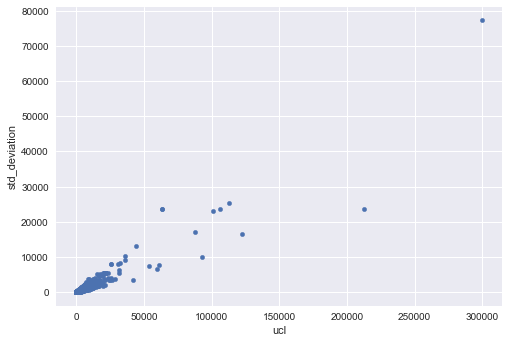

In [10]:
titulo("Ploteo de ucl versus std_deviation")

matplotlib.style.use('seaborn')

df.plot.scatter(x='ucl', y='std_deviation')


Basado en el gráfico de dispersión anterior podemos concluir que las variables de ucl y std_deviation presentan una alta correlación positiva.

Ploteo de std_deviation versus total
----------------------------------------------




<AxesSubplot:xlabel='std_deviation', ylabel='total'>

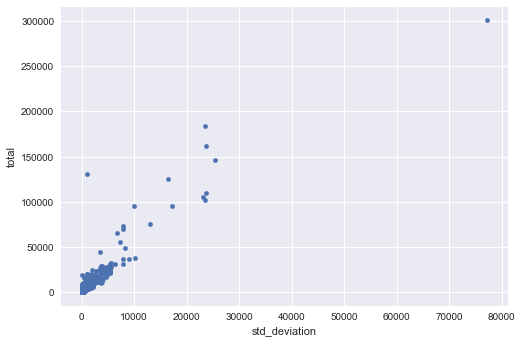

In [11]:
titulo("Ploteo de std_deviation versus total")

matplotlib.style.use('seaborn')

df.plot.scatter(x='std_deviation', y='total')


De igual forma, el gráfico anterior muestra que existe una alta correlación positiva entre las variables de std_deviation y total.

# Separacion de target y features

Antes de normalizar y estandarizar procedemos a separar features y target.

In [12]:
target = df[['valid']]
features = df[['platform_A','platform_B','total','average','std_deviation','ucl','second_notify']]

# Normalización y estandarización (Feature Scaling)

Una de las transformaciones más importantes que deben ser aplicadas a los datos es el escalamiento de características (feature scaling). En la mayoría de los casos, los algorítmos de aprendizaje automático no se desempeñan bien cuando la entrada de atributos numéricos presentan diferentes escalas. Existen dos formas comunes para conseguir que todos los datos de los atributos tengan la misma escala:

1. **Normalización (min-max scaling)**: es la más simple; los valores son cambiados y re-escalados de tal forma que se presenten en un rango de 0 a 1. Lo anterior se logra restando el valor mínimo y dividiendo por el máximo menos el mínimo. 

$$Scaler(x_i)=\frac{x_i-min(x)}{max(x) - min(x)}$$

      
2. **Estandarización:** La estandarización requiere primero restar el valor medio (mean value ${\mu}$), por lo tanto los valores estandarizados siempre presentan una media igual a cero, y después dividir por la desviación estandar (standard deviation ${\sigma}$), de tal forma que la distribución resultante presentará varianza igual a 1.


$$Scaler(x_i)=\frac{x_i-\mu}{\sigma}$$



_____
**Referencias:**

***Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron.*** 2019, second edition. Prepare the Data for Machine Learning Algorithms, Feature Scaling, pág. 69-70.

## Normalización y estandarización

In [13]:
titulo("Resultado de la normalización y estandarización")

scaler = MinMaxScaler()
nombreColumnas = features.columns.to_numpy()
datosNormalizadosEstandarizados = pd.DataFrame(scaler.fit_transform(features), columns = nombreColumnas)

print(datosNormalizadosEstandarizados)

Resultado de la normalización y estandarización
----------------------------------------------


       platform_A  platform_B     total   average  std_deviation       ucl  \
0             1.0         0.0  0.001895  0.004144       0.001294  0.001775   
1             0.0         1.0  0.000432  0.000825       0.000324  0.000392   
2             0.0         1.0  0.000259  0.000590       0.000181  0.000248   
3             1.0         0.0  0.000559  0.000884       0.000569  0.000560   
4             0.0         1.0  0.002022  0.003967       0.001618  0.001940   
...           ...         ...       ...       ...            ...       ...   
29862         1.0         0.0  0.000113  0.000059       0.000095  0.000115   
29863         0.0         1.0  0.000017  0.000031       0.000018  0.000019   
29864         0.0         1.0  0.000176  0.000387       0.000126  0.000179   
29865         0.0         1.0  0.000017  0.000019       0.000018  0.000018   
29866         0.0         1.0  0.000020  0.00

Una vez normalizada y estandarizada la data procedemos a plotear de nuevo la información para poder comparar los resultados:

Ploteo de ucl versus std_deviation
----------------------------------------------




<AxesSubplot:xlabel='ucl', ylabel='std_deviation'>

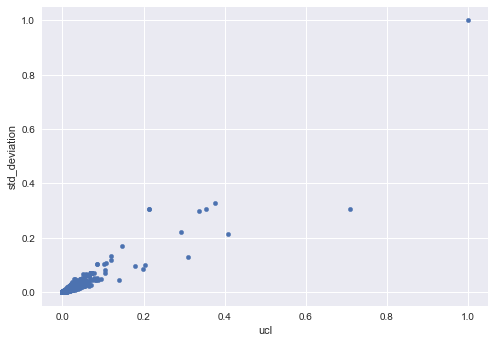

In [14]:
titulo("Ploteo de ucl versus std_deviation")

matplotlib.style.use('seaborn')

datosNormalizadosEstandarizados.plot.scatter(x='ucl', y='std_deviation')

Ploteo de std_deviation versus total
----------------------------------------------




<AxesSubplot:xlabel='std_deviation', ylabel='total'>

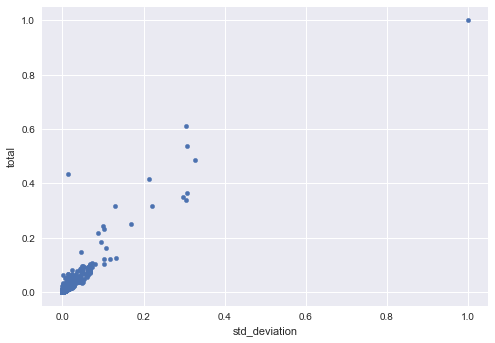

In [15]:
titulo("Ploteo de std_deviation versus total")

matplotlib.style.use('seaborn')

datosNormalizadosEstandarizados.plot.scatter(x='std_deviation', y='total')

Se puede concluir que se normalizó y estandarizó correctamente ya que se mantuvo la misma tendencia en ambos gráfico, con la única diferencia de la escala, que ahora es mucho menor que antes.

# Separación de datos de prueba y entrenamiento

Se procede a separar los datos de prueba y entrenamiento. Como las categorías del dataset están desbalanceadas (5% True, 95% False) procedemos a aplicar una técnica de RandomOverSampling

In [16]:
#!pip install imblearn
from imblearn.over_sampling import RandomOverSampler

x_train, x_test, y_train, y_test = train_test_split(datosNormalizadosEstandarizados, target, random_state=4)

titulo("Features")
print("Features Original", datosNormalizadosEstandarizados.shape)
print("Features Train", x_train.shape)
print("Features Test", x_test.shape)

newline()

titulo("Target")
print("Target Original", target.shape)
print("Target Train", y_train.shape)
print("Target Test", y_test.shape)

Features
----------------------------------------------


Features Original (29867, 7)
Features Train (22400, 7)
Features Test (7467, 7)


Target
----------------------------------------------


Target Original (29867, 1)
Target Train (22400, 1)
Target Test (7467, 1)


# Balanceo de datos

Es importante revisar el balance de las categorías.  Si no está balanceada, puede dar problemas en la predicción más adelante.

In [17]:
no_validos = y_train[y_train.valid == 0]
validos = y_train[y_train.valid == 1]

print(bold("No válidos"), no_validos.shape)
print(bold("Válidos"), validos.shape)


No válidos (21244, 1)
Válidos (1156, 1)


Como se puede notar está muy desbalanceado entre válidos y no válidos.  Como los validos son tan poquitos, decidimos optar por la estrategia de Over Sampling.

In [18]:
ros = RandomOverSampler(random_state=4) # Importante aquí utilizar el mismo random_state

x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

no_validos = y_resampled[y_resampled.valid == 0]
validos = y_resampled[y_resampled.valid == 1]

print(bold("No válidos"), no_validos.shape)
print(bold("Válidos"), validos.shape)

No válidos (21244, 1)
Válidos (21244, 1)


Como se puede notar, ambas categorías ya están balanceados.

# Regresión Logística

Debido a que target la categoría solo son dos tipos de categoría: falso o verdadero.  Este es de carácter logística.  Vale la pena probar el algoritmo de regresión logística para crear el modelo de machine learning.

## Afinamiento de hiperparámetros y entrenamiento

Probaremos varios hiperparámetros para el modelo de regresión logística para determinar cuál es el que mejor funciona mediante la experimentación del entrenamiento del modelo.

In [19]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

model_lr = GridSearchCV(lr, parameters, cv = 5)
model_lr.fit(x_resampled, y_resampled.values.ravel())

print_results(model_lr)

BEST PARAMS: {'C': 1000}

0.526 (+/-0.008) for {'C': 0.001}
0.528 (+/-0.008) for {'C': 0.01}
0.536 (+/-0.008) for {'C': 0.1}
0.539 (+/-0.007) for {'C': 1}
0.539 (+/-0.007) for {'C': 10}
0.539 (+/-0.008) for {'C': 100}
0.541 (+/-0.006) for {'C': 1000}


## Evaluación del modelo regresión logística

Usaremos Accuracy para evaluar la efectividad del modelo de regresión logística.

In [20]:
y_train_predict_model_lr = model_lr.predict(x_resampled)
y_test_predict_model_lr = model_lr.predict(x_test)

titulo("Accuracy del modelo de regresión logística")
accuracy_train_vs_test(y_resampled, y_train_predict_model_lr, y_test, y_test_predict_model_lr)

titulo("Matriz de Confusión")
confusion_matrix_train_vs_test(y_resampled, y_train_predict_model_lr, y_test, y_test_predict_model_lr)

Accuracy del modelo de regresión logística
----------------------------------------------


Training Accuracy:  0.5407173790246658
Test Accuracy:  0.43015936788536224
Difference between both:  0.11055801113930352
Matriz de Confusión
----------------------------------------------


Matriz de Confusión de Training:
[[ 8998 12246]
 [ 7268 13976]]


Matriz de Confusión de Test: 
[[2945 4119]
 [ 136  267]]


## Análisis del modelo regresión logística

Se puede notar que es muy bajo el accuracy este modelo de machine learning.  La matriz de confusión se puede notar que hay muchos falsos positivos y falsos negativos.  El mejor hiperparámetro para learning rate es 1000.  Se va probar nuevamente con mayores opciones.

## Afinamiento de hiperparámetros y entrenamiento 2

Probaremos varios hiperparámetros para el modelo de regresión logística para determinar cuál es el que mejor funciona mediante la experimentación del entrenamiento del modelo.

In [21]:
parameters = {
    'C': [500, 600, 700, 800, 900, 1000, 1100]
}

model_lr2 = GridSearchCV(lr, parameters, cv = 5)
model_lr2.fit(x_resampled, y_resampled.values.ravel())

print_results(model_lr2)

BEST PARAMS: {'C': 1000}

0.54 (+/-0.007) for {'C': 500}
0.54 (+/-0.007) for {'C': 600}
0.541 (+/-0.006) for {'C': 700}
0.541 (+/-0.006) for {'C': 800}
0.541 (+/-0.006) for {'C': 900}
0.541 (+/-0.006) for {'C': 1000}
0.541 (+/-0.006) for {'C': 1100}


## Evaluación del modelo regresión logística 2

Usaremos Accuracy para evaluar la efectividad del modelo de regresión logística.

In [22]:
y_train_predict_model_lr2 = model_lr2.predict(x_resampled)
y_test_predict_model_lr2 = model_lr2.predict(x_test)

titulo("Accuracy del modelo de regresión logística")
accuracy_train_vs_test(y_resampled, y_train_predict_model_lr2, y_test, y_test_predict_model_lr2)

newline()

titulo("Matriz de Confusión")
confusion_matrix_train_vs_test(y_resampled, y_train_predict_model_lr2, y_test, y_test_predict_model_lr2)

Accuracy del modelo de regresión logística
----------------------------------------------


Training Accuracy:  0.5407173790246658
Test Accuracy:  0.43015936788536224
Difference between both:  0.11055801113930352


Matriz de Confusión
----------------------------------------------


Matriz de Confusión de Training:
[[ 8998 12246]
 [ 7268 13976]]


Matriz de Confusión de Test: 
[[2945 4119]
 [ 136  267]]


## Análisis del modelo regresión logística 2

Se puede notar que llegamos al mejor resultado posible con ajuste de hiperparámetro.  El mejor hiperparámetro para learning rate es 1000.  No hubo cambios en los resultados.

# Algoritmo kNN

Procederemos a usar el algoritmo kNN para crear modelo de predicción para nuestro data set y así poder determinar cuál sería el mejor para la solución de nuestra problemática.

## Afinamiento de hiperparámetros y entrenamiento

Probaremos varios hiperparámetros para el modelo de kNN para determinar cuál es el que mejor funciona mediante la experimentación del entrenamiento del modelo.

In [23]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [2, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean']
}

model_knn = GridSearchCV(knn, parameters, cv = 5)
model_knn.fit(x_resampled, y_resampled.values.ravel())

print_results(model_knn)

BEST PARAMS: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}

0.958 (+/-0.004) for {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
0.958 (+/-0.004) for {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
0.938 (+/-0.003) for {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
0.941 (+/-0.003) for {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.918 (+/-0.004) for {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
0.925 (+/-0.003) for {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
0.898 (+/-0.004) for {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
0.911 (+/-0.004) for {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.958 (+/-0.005) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.958 (+/-0.005) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.938 (+/-0.003) for {'metric': 'euclidean', 'n_neighbors': 3, 'wei

## Evaluación de kNN primera corrida

Ahora procedemos ha evaluar la efectividad de la predicción con nuestro modelo de kNN utilizando la métrica de accuracy.

In [24]:
y_train_predict_model_knn = model_knn.predict(x_resampled)
y_test_predict_model_knn = model_knn.predict(x_test)

titulo("Accuracy del modelo de kNN")
accuracy_train_vs_test(y_resampled, y_train_predict_model_knn, y_test, y_test_predict_model_knn)

newline()

titulo("Matriz de Confusión")
confusion_matrix_train_vs_test(y_resampled, y_train_predict_model_knn, y_test, y_test_predict_model_knn)

Accuracy del modelo de kNN
----------------------------------------------


Training Accuracy:  0.9865373752588966
Test Accuracy:  0.9046471139681265
Difference between both:  0.08189026129077015


Matriz de Confusión
----------------------------------------------


Matriz de Confusión de Training:
[[21225    19]
 [  553 20691]]


Matriz de Confusión de Test: 
[[6711  353]
 [ 359   44]]


## Análisis de kNN

Se puede notar el mejor hiperparámetro de vecinos es 2, métrica manhattan y peso uniforme.  La matriz de confusión muestra relativamente bajo falso positivos y falso negativos.


# Algoritmo de árboles de decisión

Procederemos a usar el algoritmo árboles de decisión para crear modelo de predicción para nuestro data set y así poder determinar cuál sería el mejor para la solución de nuestra problemática.

## Aplicación del hiper parámetro profundidad 2

Construimos el clasificador de Decission Tree con una profundidad máxima de 2:

In [25]:
dt_clf = DecisionTreeClassifier(max_depth=2)

Entrenamos nuestro clasificador con los datos de features y target:

In [26]:
dt_clf = dt_clf.fit(x_resampled, y_resampled)

Visualizamos nuestro árbol de decisión entrenado mediante la herramienta Graphviz: https://urldefense.com/v3/__https://graphviz.org/__;!!J0Eel5oVi2rp!58XIur7QrD2b0TpQU5Rfgd-eS1HiPLlc8EWZzJQF9dS-Ah186b3759R-6vk$ 

In [27]:
export_graphviz(
    dt_clf, 
    out_file='data_tree.dot', 
    feature_names=features.columns, 
    class_names=["1","0"], 
    rounded=True, 
    filled=True)

Se convierte el archivo .dot a .png (o con la siguiente línea de código en el command-line: dot -Tpng data_tree.dot -o data_tree.png) y lo visualizamos:

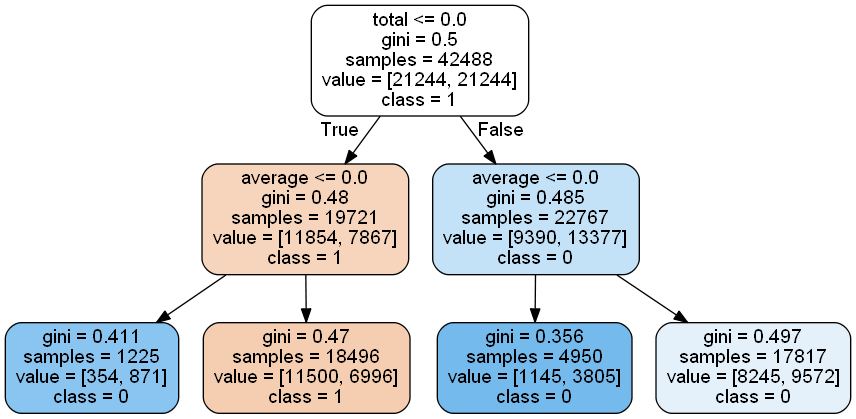

In [28]:
#from subprocess import call
#call(['dot','-T, 'png','data_tree.dot','-o','data_tree.png'])

from IPython.display import Image
Image("data_tree.png")

## Evaluación de profundidad 2

Ahora procedemos ha evaluar la efectividad de la predicción con nuestro modelo de Árbol de decisión utilizando la métrica de accuracy.

In [29]:
y_train_predict_dt_clf = dt_clf.predict(x_resampled)
y_test_predict_dt_clf = dt_clf.predict(x_test)

titulo("Accuracy del modelo de árboles de decisión")
accuracy_train_vs_test(y_resampled, y_train_predict_dt_clf, y_test, y_test_predict_dt_clf)

newline()

titulo("Matriz de Confusión")
confusion_matrix_train_vs_test(y_resampled, y_train_predict_dt_clf, y_test, y_test_predict_dt_clf)

Accuracy del modelo de árboles de decisión
----------------------------------------------


Training Accuracy:  0.6060064018075692
Test Accuracy:  0.544529262086514
Difference between both:  0.061477139721055174


Matriz de Confusión
----------------------------------------------


Matriz de Confusión de Training:
[[11500  9744]
 [ 6996 14248]]


Matriz de Confusión de Test: 
[[3833 3231]
 [ 170  233]]


## Análisis de profundidad 2

Se puede notar un excelente resultado en el modelo de predicción usando profundidad 2, sin embargo continuaremos experimentando y explorando.

## Aplicación de hiper parámetro profundidad 3

Ahora procedemos a evaluar el modelo de árbol de decisión con una profundidad de 3.

In [30]:
dt_clf2 = DecisionTreeClassifier(max_depth=3)

dt_clf2 = dt_clf2.fit(x_resampled, y_resampled)

In [31]:
# Visualizamos el nuevo árbol

export_graphviz(
    dt_clf2, 
    out_file='data_tree2.dot', 
    feature_names=features.columns, 
    class_names=["1","0"], 
    rounded=True, 
    filled=True)

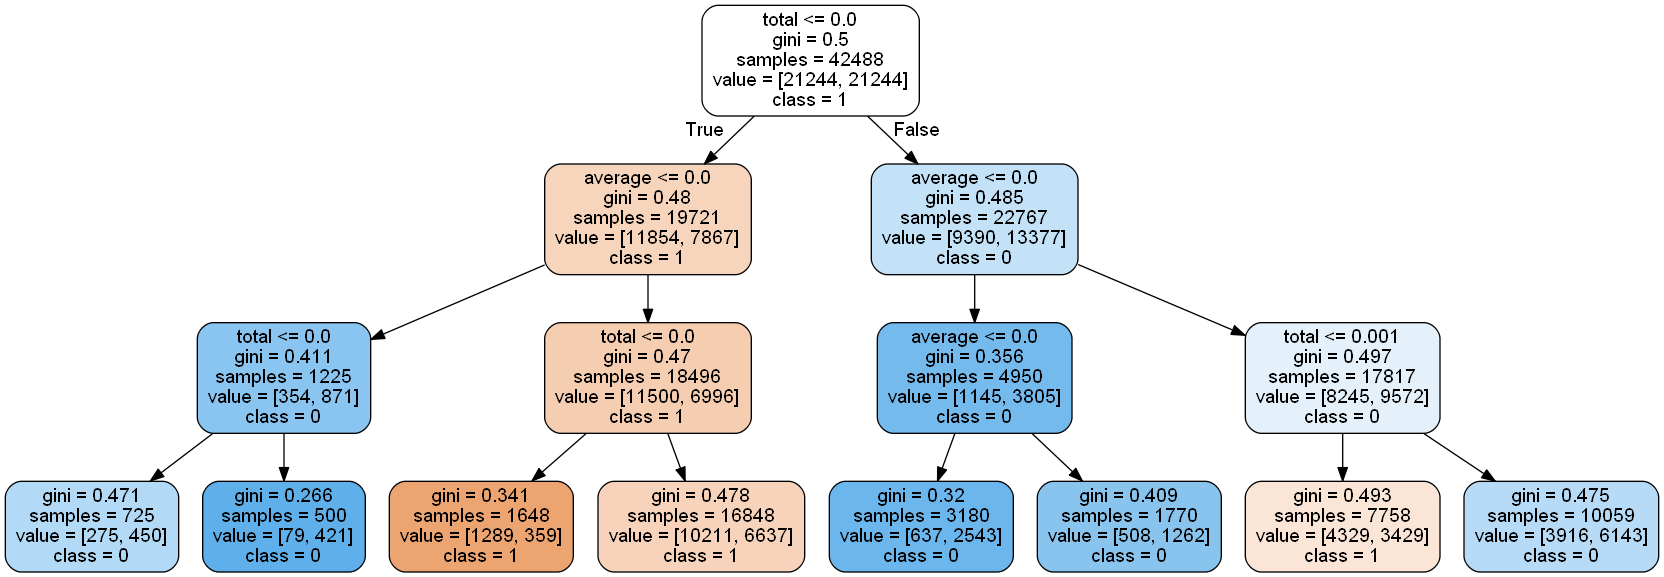

In [32]:
# dot -Tpng data_tree2.dot -o data_tree2.png

Image("data_tree2.png")

## Evaluación de profundidad 3

Ahora procedemos ha evaluar la efectividad de la predicción con nuestro modelo de Árbol de decisión utilizando la métrica de accuracy.

In [33]:
y_train_predict_dt_clf2 = dt_clf2.predict(x_resampled)
y_test_predict_dt_clf2 = dt_clf2.predict(x_test)

titulo("Accuracy del modelo de árboles de decisión")
accuracy_train_vs_test(y_resampled, y_train_predict_dt_clf2, y_test, y_test_predict_dt_clf2)

newline()

titulo("Matriz de Confusión")
confusion_matrix_train_vs_test(y_resampled, y_train_predict_dt_clf2, y_test, y_test_predict_dt_clf2)

Accuracy del modelo de árboles de decisión
----------------------------------------------


Training Accuracy:  0.6271888533232913
Test Accuracy:  0.7296102852551225
Difference between both:  0.10242143193183117


Matriz de Confusión
----------------------------------------------


Matriz de Confusión de Training:
[[15829  5415]
 [10425 10819]]


Matriz de Confusión de Test: 
[[5274 1790]
 [ 229  174]]


## Análisis de profundidad 3

Observamos que no hay mucha diferencia entre el training accuracy de ambas profundidades, sin embargo en el modelo de profundidad 3 hay una mejoría en el training accuracy.  

## Aplicación de hiper parámetro profundidad 4

Ahora procedemos a evaluar el modelo de árbol de decisión con una profundidad de 4.

In [34]:
dt_clf3 = DecisionTreeClassifier(max_depth = 4)

dt_clf3 = dt_clf3.fit(x_resampled, y_resampled)

In [35]:
# Visualizamos el nuevo árbol

export_graphviz(
    dt_clf3, 
    out_file='data_tree3.dot', 
    feature_names=features.columns, 
    class_names=["1","0"], 
    rounded=True, 
    filled=True)

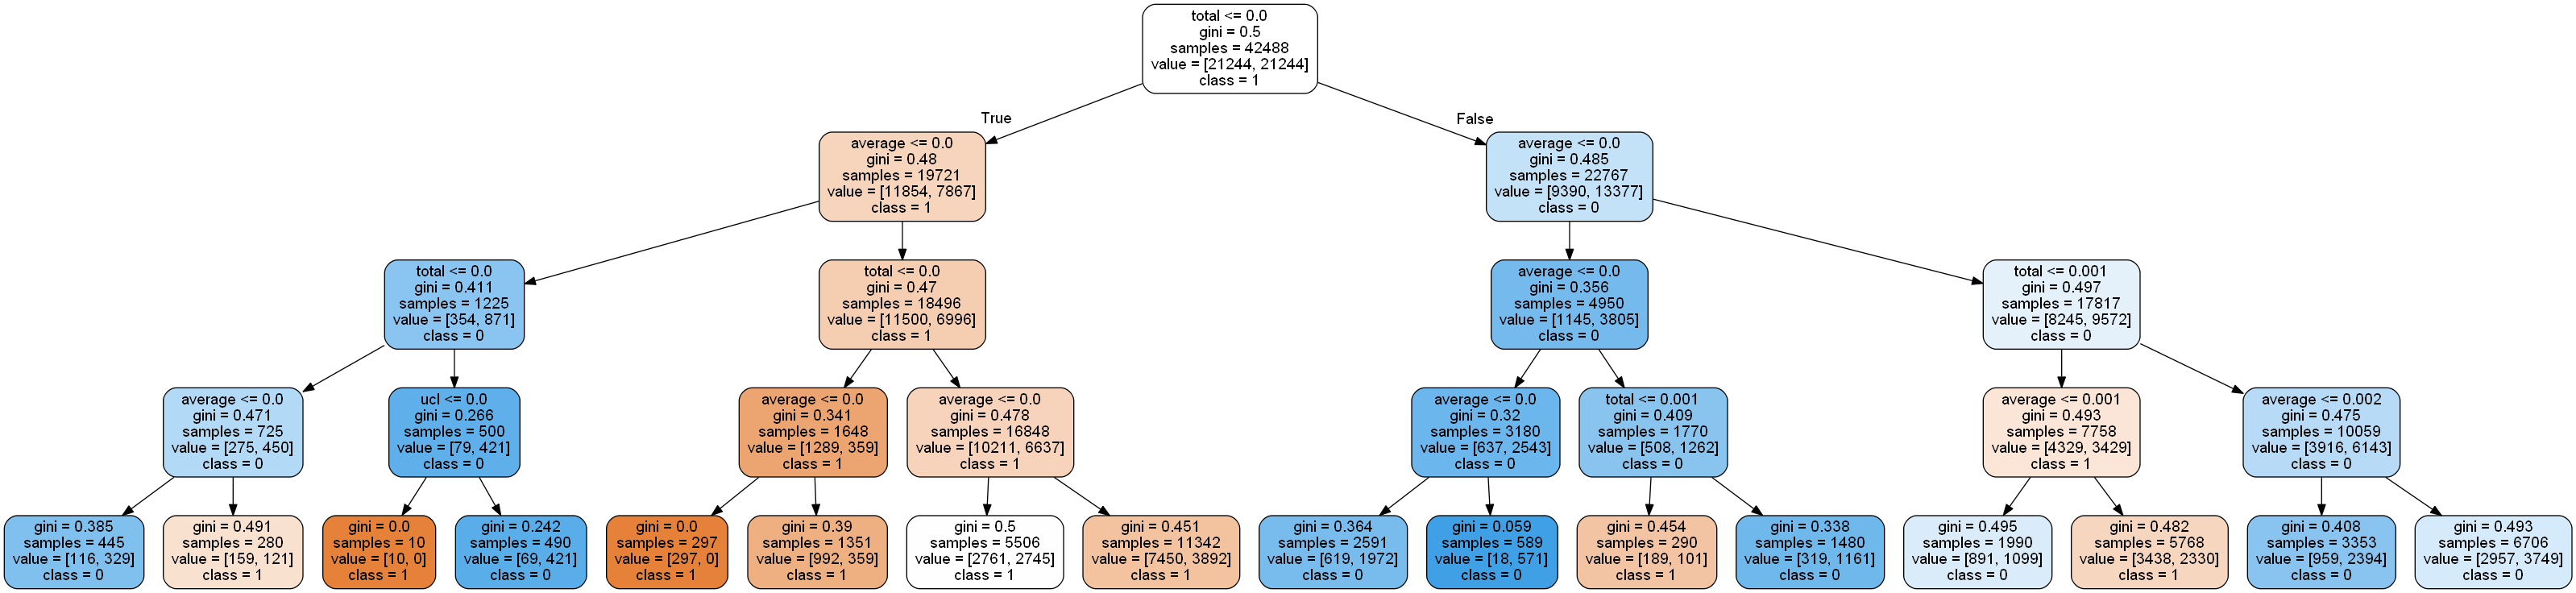

In [36]:
# dot -Tpng data_tree3.dot -o data_tree3.png

Image("data_tree3.png")

## Evaluación de profundidad 4

Ahora procedemos ha evaluar la efectividad de la predicción con nuestro modelo de Árbol de decisión utilizando la métrica de accuracy.

In [37]:
y_train_predict_dt_clf3 = dt_clf3.predict(x_resampled)
y_test_predict_dt_clf3 = dt_clf3.predict(x_test)

titulo("Accuracy del modelo de árboles de decisión")
accuracy_train_vs_test(y_resampled, y_train_predict_dt_clf3, y_test, y_test_predict_dt_clf3)

newline()

titulo("Matriz de Confusión")
confusion_matrix_train_vs_test(y_resampled, y_train_predict_dt_clf3, y_test, y_test_predict_dt_clf3)

Accuracy del modelo de árboles de decisión
----------------------------------------------


Training Accuracy:  0.635285257013745
Test Accuracy:  0.7045667604124816
Difference between both:  0.06928150339873651


Matriz de Confusión
----------------------------------------------


Matriz de Confusión de Training:
[[15296  5948]
 [ 9548 11696]]


Matriz de Confusión de Test: 
[[5071 1993]
 [ 213  190]]


## Análisis de profundidad 4

Observamos que ambos training y test accuracy hubo una leve mejoría y la diferencia entre ambas disminuyó con respecto nivel de profundidad 3.  Debido a este buen resultado, consideraríamos este el mejor resultado para árboles de decisión.

# Algoritmo Naive Bayes

## Teoría de algoritmo de Naive Bayes

Los clasificadores del algoritmo de Naive Bayes se basan en el teorema de Bayes, el cual es una ecuación que describe la relación de probabilidades condicionales de cifras estadísticas. La idea de este tipo de clasificación es encontrar la probabilidad de una etiqueta (label) dadas las características observadas (features), que se expresa como **P(L | features)**, que el teorema de Bayes expresa de la siguiente forma:

$$ P(L | features) = \frac{P(features | L) P(L)}{P(features)} $$

## Aplicación del algoritmo Naive Bayes Gausiano

Debido a que el modelo se complica entre más etiquetas contenga nuestra base de datos (**Generative model**), se requiere un simplificador de los supuestos considerados (de lo cual procede la denominación "Naive" o ingenuo). Para el ejemplo a desarrollar sobre la base de datos "data.csv", aplicaremos el conjunto de supuestos del algoritmo **Gaussian naive Bayes** (que supone que los datos están representados por una distribución Gausiana o normal).

In [38]:
gnb = GaussianNB()
parameters = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

model_gnb = GridSearchCV(gnb, parameters, cv = 5)
model_gnb.fit(x_resampled, y_resampled.values.ravel())

print_results(model_gnb)

BEST PARAMS: {'var_smoothing': 0.005336699231206307}

0.526 (+/-0.008) for {'var_smoothing': 1.0}
0.526 (+/-0.008) for {'var_smoothing': 0.8111308307896871}
0.526 (+/-0.009) for {'var_smoothing': 0.657933224657568}
0.528 (+/-0.008) for {'var_smoothing': 0.533669923120631}
0.528 (+/-0.008) for {'var_smoothing': 0.43287612810830584}
0.528 (+/-0.008) for {'var_smoothing': 0.3511191734215131}
0.528 (+/-0.008) for {'var_smoothing': 0.2848035868435802}
0.528 (+/-0.008) for {'var_smoothing': 0.23101297000831597}
0.528 (+/-0.008) for {'var_smoothing': 0.1873817422860384}
0.528 (+/-0.008) for {'var_smoothing': 0.15199110829529336}
0.528 (+/-0.008) for {'var_smoothing': 0.12328467394420659}
0.528 (+/-0.008) for {'var_smoothing': 0.1}
0.528 (+/-0.008) for {'var_smoothing': 0.08111308307896872}
0.528 (+/-0.008) for {'var_smoothing': 0.0657933224657568}
0.528 (+/-0.008) for {'var_smoothing': 0.0533669923120631}
0.528 (+/-0.008) for {'var_smoothing': 0.04328761281083057}
0.529 (+/-0.008) for {'var_s

## Evaluación del algoritmo Naive Bayes Gausiano

Seguidamente procedemos a evaluar la predicción con nuestro set de prueba.

In [39]:
y_train_predict_model_gnb = model_gnb.predict(x_resampled)
y_test_predict_model_gnb = model_gnb.predict(x_test)

titulo("Accuracy del modelo de Naive Bayes")
accuracy_train_vs_test(y_resampled, y_train_predict_model_gnb, y_test, y_test_predict_model_gnb)

newline()

titulo("Matriz de Confusión")
confusion_matrix_train_vs_test(y_resampled, y_train_predict_model_gnb, y_test, y_test_predict_model_gnb)

Accuracy del modelo de Naive Bayes
----------------------------------------------


Training Accuracy:  0.5364102805498023
Test Accuracy:  0.43390920048212134
Difference between both:  0.102501080067681


Matriz de Confusión
----------------------------------------------


Matriz de Confusión de Training:
[[ 9080 12164]
 [ 7533 13711]]


Matriz de Confusión de Test: 
[[2977 4087]
 [ 140  263]]


## Análisis del algoritmo Naive Bayes Gausiano

Podemos observar que se obtiene un excelente resultado.  Comparable con el de árboles de decisiones.

# Algoritmo Naive Bayes Multinomial

Probaremos con este otro algoritmo de aprendizaje también.

In [40]:
mnb = MultinomialNB()
parameters = {
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
}

model_mnb = GridSearchCV(mnb, parameters, cv = 5)
model_mnb.fit(x_resampled, y_resampled.values.ravel())

print_results(model_mnb)

BEST PARAMS: {'alpha': 0.1}

0.535 (+/-0.007) for {'alpha': 1}
0.536 (+/-0.008) for {'alpha': 0.1}
0.536 (+/-0.008) for {'alpha': 0.01}
0.536 (+/-0.008) for {'alpha': 0.001}
0.536 (+/-0.008) for {'alpha': 0.0001}
0.536 (+/-0.008) for {'alpha': 1e-05}


## Evaluación del algoritmo Naive Bayes Multinomial

Seguidamente procedemos a evaluar la predicción con nuestro set de prueba.

In [41]:
y_train_predict_model_mnb = model_mnb.predict(x_resampled)
y_test_predict_model_mnb = model_mnb.predict(x_test)

titulo("Accuracy del modelo de Naive Bayes Multinomial")
accuracy_train_vs_test(y_resampled, y_train_predict_model_mnb, y_test, y_test_predict_model_mnb)

newline()

titulo("Matriz de Confusión")
confusion_matrix_train_vs_test(y_resampled, y_train_predict_model_mnb, y_test, y_test_predict_model_mnb)

Accuracy del modelo de Naive Bayes Multinomial
----------------------------------------------


Training Accuracy:  0.5353511579740162
Test Accuracy:  0.4352484264095353
Difference between both:  0.1001027315644809


Matriz de Confusión
----------------------------------------------


Matriz de Confusión de Training:
[[ 9111 12133]
 [ 7609 13635]]


Matriz de Confusión de Test: 
[[2988 4076]
 [ 141  262]]


## Análisis del algoritmo Naive Bayes Multinomial

Podemos observar que se obtiene casi los mismos resultados que Naive Bayes Gausiano.  Nada más hay una leve mejoría en la diferencia entre el accuracy de test y training.

# Teoría de Métricas de evaluación de clasificación

## Matriz de confusión

La idea general de la ***Matriz de confusión*** es contar el número de veces que las instancias de la **clase A** son clasificados como **clase B**. Para computar la ***Matriz de confusión*** se requiere tener primero un conjunto de predicciones de tal forma que pueda ser comparado con el target real. Como resultado de la aplicación de esta técnica se obtiene una matriz en la que cada fila representa los datos reales de cada clase, mientras que las columnas representan la  predicción de cada clase, teniendo como componentes en cada caso negativos y positivos respectivamente. Así, la primera casilla de la primera fila representará los negativos verdaderos (***true negatives***) y la de las segunda casilla de esa primera fila los falsos positivos (***false positives***); la primera casilla de la segunda fila muestra los falsos negativos (***false negatives***) y finalmente la segunda casilla de esa última fila representa los positivos verdaderos (***true positives***).

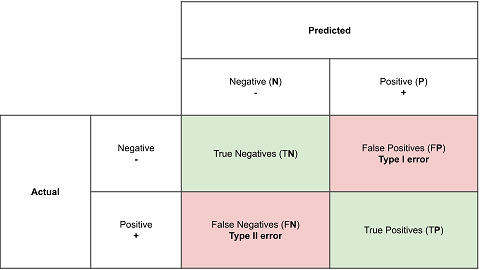

In [42]:
Image("confusion_matrix.png")

In [43]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [44]:
X, Y = mnist["data"], mnist["target"]
X.shape # 70 mil imágenes y 784 features (28 x 28 pixels), each pixel = intensity from 0 (white) to 255 (black)

(70000, 784)

In [45]:
Y.shape

(70000,)

In [46]:
Y[0]

'5'

In [47]:
Y = Y.astype(np.uint8) # Convierte la información de strings a números (integer)

In [48]:
X_train, X_test, Y_train, Y_test = X[:6000], X[6000:], Y[:6000], Y[6000:] # Training set = 60,000, test set = 10,000

In [49]:
# Para simplificar, se escoge únicamente un dígito, el 5
Y_train_5 = (Y_train == 5)
Y_test_5 = (Y_test == 5)

In [50]:
sgd_clf = SGDClassifier(random_state=42) # Se escoge el parámetro 42 para obtener resultados reproducibles
sgd_clf.fit(X_train, Y_train_5)

SGDClassifier(random_state=42)

In [51]:
# Aplicación de la métrica de Confusion Matrix
# Primero se debe contar con el set de predicciones para poder comparar con el target real
# Se utiliza para el ejemplo la función cross_val_predict


Y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train_5, cv = 3) 

In [52]:
confusion_matrix(Y_train_5, Y_train_pred)

array([[5375,  111],
       [ 120,  394]], dtype=int64)

El resultado de la matriz nos indica que tenemos 5,375 casos correctamente clasificados como que no son el número 5 (**true negatives TN**), mientras que los restantes 111 fueron erróneamente clasificados como números 5 (**false positives FP**). La segunda fila considera las imágenes reales del número 5 (**positive class**) de las cuales 120 fueron erróneamente clasificadas como que no eran números 5 (**false negatives FN**) y los restantes 394 fueron correctamente identificados con el número 5 (**true positives TP**).

Un clasificador perfecto daría como resultado una matriz que contendría únicamente true positives y true negatives, con valores diferentes a cero (**nonzero**) únicamente en su diagonal principal (la que va del extremo superior izquierdo al inferior derecho).

In [53]:
# Ejemplo de una matriz de confución con un clasificador perfecto:

Y_train_perfect_predictions = Y_train_5 # Simula que se alcanzó la perfección
confusion = confusion_matrix(Y_train_5, Y_train_perfect_predictions)
titulo("Confusion matrix - Con clasificador perfecto")
print(confusion)

Confusion matrix - Con clasificador perfecto
----------------------------------------------


[[5486    0]
 [   0  514]]


La **matriz de confución** genera bastante información pero frecuentemente se requiere contar con métricas más concisas, lo cual podemos obtener estableciendo relaciones con el resultado de los diferentes cuadrantes, como por ejemplo:

**Métrica de exactitud (Accuracy)**

La métrica **Accuracy** es el número de predicciones correctas (TP y TN) dividido por el número de todas las muestras:

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$




In [54]:
# Ejemplo de la aplicación de la métrica de exactitud (accuracy)

accuracy = accuracy_score(Y_train_5, Y_train_pred)
titulo("Métrica Exactitud")
print(accuracy)

Métrica Exactitud
----------------------------------------------


0.9615


**Métrica de precisión (Precision)**

La métrica **Precision** mide cuántas de las muestras pronosticadas como positivas son realmente positivas; es generalmente utilizada como una medida de desempeño cuando el objetivo es limitar el número de falsos positivos (por ejemplo en las pruebas de fármacos, que son test muy onerosos y por lo tanto se requiere de mucha precisión). También se conoce como **positive predictive value (PPV)**:

$$Precision =\frac{TP}{TP + FP}$$

In [55]:
# Ejemplo de la aplicación de la métrica de precision

precision = precision_score(Y_train_5, Y_train_pred)
titulo("Métrica Precision")
print(precision)

Métrica Precision
----------------------------------------------


0.7801980198019802



**Métrica de exhaustividad (Recall)**

La métrica **Recall** mide cuántas de las muestras positivas fueron cubiertas por las predicciones positivas; es usada como métrica de desempeño cuando se necesita identificar todas las muestras positivas, es decir, cuando es importante evitar los falsos negativos (por ejemplo en la detección de enfermedades, donde es importante identificar a todas las personas que estén enfermas). También se conoce con los nombres de sensitivity, hit rate o **true positive rate (TPR)**:

$$Recall =\frac{TP}{TP + FN}$$


In [56]:
# Ejemplo de la aplicación de la métrica de recall

recall = recall_score(Y_train_5, Y_train_pred)
titulo("Métrica Recall")
print(recall)

Métrica Recall
----------------------------------------------


0.7665369649805448


_____
**Referencias:**

***Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron.*** 2019, second edition. Prepare the Data for Machine Learning Algorithms, Feature Scaling, pág. 90.

***Introduction to Machine Learning with Python. Andreas C. Müller.*** 2017, Third edition. Evaluation Metrics and Scoring, pág. 289-290.
_____

# Teoría de métricas de evaluación de regresión

## Error medio absoluto

Esta métrica de regresión es el valor medio de la diferencia absoluta entre el valor real y el valor predicho.  Entre menor el numero más exacto es.


**Formula:**

$$MAE=\frac{1}{n} \sum_{i=1}^{n} \left\lvert{real_{i} - predicho_{i}}\right\rvert$$


**Ejemplo:**

In [57]:
Actual = np.array([2,3,4,5,6,7,8,9])
Forecast = np.array([1,3,5,4,6,7,10,7])

El siguiente código muestra cómo calcular el error medio absoluto para este modelo:

In [58]:
print(bold("Resultado MAE = "), mean_absolute_error(Actual, Forecast))

Resultado MAE =  0.875


## Error cuadrático medio (ECM)

El error cuadrático medio (ECM) calcula el valor medio de la diferencia al cuadrado entre el valor real y el predicho para todos los puntos de datos. Todos los valores relacionados se elevan a la segunda potencia, por lo tanto, todos los valores negativos no se compensan con los positivos. Además, debido a las características de esta métrica, el impacto de los errores es mayor. Por ejemplo, si el error en nuestros cálculos iniciales es de 1/2/3, el ECM será igual a 1/4/9 respectivamente. Cuanto menor sea el ECM, más precisas serán nuestras predicciones. ECM = 1 es el punto óptimo en el que nuestro pronóstico es perfectamente preciso.

El ECM tiene algunas ventajas frente al EMA:

1. El ECM destaca grandes errores entre los pequeños.
2. El ECM es diferenciable, lo que ayuda a encontrar los valores mínimos y máximos utilizando los métodos matemáticos de manera más efectiva.

**Formula:**

$$ECM=\frac{1}{n} \sum_{i=1}^{n} (real_{i} - predicho_{i})^{2}$$


**Ejemplo:**

Utilizando los mismos datos anteriores Actual y Forecast, se muestra el siguiente codigo ejemplo el calculo ECM.

In [59]:
print(bold("Resultado ECM = "), mean_squared_error(Actual, Forecast))

Resultado ECM =  1.375


## Raíz del error cuadrático medio (RECM)

El RECM es la raíz cuadrada del ECM. Es fácil de interpretar en comparación con el ECM y utiliza valores absolutos más pequeños, lo que es útil para los cálculos informáticos.

**Formula:**

$$RECM = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (real_{i} - predicho_{i})^{2}}$$


**Ejemplo:**

Utilizando los mismos datos anteriores Actual y Forecast, se muestra el siguiente codigo ejemplo el calculo RECM.

In [60]:
print(bold("Resultado RECM = "), sqrt(mean_squared_error(Actual, Forecast)))

Resultado RECM =  1.1726039399558574


_____
**Referencias:**

***Selección de métricas para aprendizaje automático*** https://urldefense.com/v3/__https://fayrix.com/machine-learning-metrics_es__;!!J0Eel5oVi2rp!58XIur7QrD2b0TpQU5Rfgd-eS1HiPLlc8EWZzJQF9dS-Ah186b37nFKAN5I$ 

# Conclusión

Cada algoritmo de machine learning tiene sus caracteristícas y pudimos ver que producen diferentes modelos con diferentes resultados. Lo más importante es entender el problema y las características de los datos para aplicar diferentes algoritmos y probarlos modificando sus parámetros y las métricas para medir el desempeño y así poder tomar una mejor decisión a la hora de escoger el que genere mejores predicciones para el problema que se quiere resolver. En nuestro caso, el algorítimo que nos dió marcadamente un mejor resultado fue el de kNN como se muestra a continuación, con una métrica de accuracy del 90.46%, lo cual, teniendo los datos ya balanceados, nos parece que es el modelo que generaliza bastante bien las predicciones del problema abordado.

## Accuracy y Matriz de confusión de regresión logística

In [61]:
titulo("Accuracy del modelo de regresión logística")
accuracy_train_vs_test(y_resampled, y_train_predict_model_lr, y_test, y_test_predict_model_lr)

newline()

titulo("Matriz de Confusión")
confusion_matrix_train_vs_test(y_resampled, y_train_predict_model_lr, y_test, y_test_predict_model_lr)

Accuracy del modelo de regresión logística
----------------------------------------------


Training Accuracy:  0.5407173790246658
Test Accuracy:  0.43015936788536224
Difference between both:  0.11055801113930352


Matriz de Confusión
----------------------------------------------


Matriz de Confusión de Training:
[[ 8998 12246]
 [ 7268 13976]]


Matriz de Confusión de Test: 
[[2945 4119]
 [ 136  267]]


## Accuracy y Matriz de confusión de kNN

In [62]:
titulo("Accuracy del modelo de kNN")
accuracy_train_vs_test(y_resampled, y_train_predict_model_knn, y_test, y_test_predict_model_knn)

newline()

titulo("Matriz de Confusión")
confusion_matrix_train_vs_test(y_resampled, y_train_predict_model_knn, y_test, y_test_predict_model_knn)

Accuracy del modelo de kNN
----------------------------------------------


Training Accuracy:  0.9865373752588966
Test Accuracy:  0.9046471139681265
Difference between both:  0.08189026129077015


Matriz de Confusión
----------------------------------------------


Matriz de Confusión de Training:
[[21225    19]
 [  553 20691]]


Matriz de Confusión de Test: 
[[6711  353]
 [ 359   44]]


## Accuracy y Matriz de confusión de árboles de decisión

In [63]:
titulo("Accuracy del modelo de árboles de decisión")
accuracy_train_vs_test(y_resampled, y_train_predict_dt_clf, y_test, y_test_predict_dt_clf)

newline()

titulo("Matriz de Confusión")
confusion_matrix_train_vs_test(y_resampled, y_train_predict_dt_clf3, y_test, y_test_predict_dt_clf3)

Accuracy del modelo de árboles de decisión
----------------------------------------------


Training Accuracy:  0.6060064018075692
Test Accuracy:  0.544529262086514
Difference between both:  0.061477139721055174


Matriz de Confusión
----------------------------------------------


Matriz de Confusión de Training:
[[15296  5948]
 [ 9548 11696]]


Matriz de Confusión de Test: 
[[5071 1993]
 [ 213  190]]


## Accuracy y Matriz de confusión de Naive Bayes Gausiano

In [64]:
titulo("Accuracy del modelo de Naive Bayes Gausiano")
accuracy_train_vs_test(y_resampled, y_train_predict_model_gnb, y_test, y_test_predict_model_gnb)

newline()

titulo("Matriz de Confusión")
confusion_matrix_train_vs_test(y_resampled, y_train_predict_model_gnb, y_test, y_test_predict_model_gnb)

Accuracy del modelo de Naive Bayes Gausiano
----------------------------------------------


Training Accuracy:  0.5364102805498023
Test Accuracy:  0.43390920048212134
Difference between both:  0.102501080067681


Matriz de Confusión
----------------------------------------------


Matriz de Confusión de Training:
[[ 9080 12164]
 [ 7533 13711]]


Matriz de Confusión de Test: 
[[2977 4087]
 [ 140  263]]


## Accuracy y Matriz de confusión de Naive Bayes Multinomial

In [65]:
titulo("Accuracy del modelo de Naive Bayes Multinomial")
accuracy_train_vs_test(y_resampled, y_train_predict_model_mnb, y_test, y_test_predict_model_mnb)

newline()

titulo("Matriz de Confusión")
confusion_matrix_train_vs_test(y_resampled, y_train_predict_model_mnb, y_test, y_test_predict_model_mnb)

Accuracy del modelo de Naive Bayes Multinomial
----------------------------------------------


Training Accuracy:  0.5353511579740162
Test Accuracy:  0.4352484264095353
Difference between both:  0.1001027315644809


Matriz de Confusión
----------------------------------------------


Matriz de Confusión de Training:
[[ 9111 12133]
 [ 7609 13635]]


Matriz de Confusión de Test: 
[[2988 4076]
 [ 141  262]]
